In [1]:
import numpy as np
from sympy import *
from pylab import *
import matplotlib.pyplot as plt
from IPython.display import display, Math
plt.rcParams["figure.figsize"] = (12,8)
plt.rcParams['font.size'] = 24
plt.rcParams['legend.fontsize'] = 14

## Heat Conduction Equation :

# $\qquad\qquad\displaystyle\boxed{\frac{\partial u(x,t)}{\partial t}=\frac{\partial u^2(x,t)}{\partial x^2}} $

$\qquad\qquad\displaystyle\text{range }: 0\leq x\leq a \ , \quad t\geq 0$

$\qquad\qquad\displaystyle\text{Initial condition}: u(x,0)=f(x) \ , \qquad \text{Boundary condition}\begin{equation*} = \left\{\begin{array}{rl} u(0,t)=A \\ u(a,t)=B \end{array}\right.\end{equation*}$



In [2]:
def heat_eqn(x,t,boundaryConditions,initialConditions):
    T=np.zeros((len(x),len(t)))
    T[0,:]=boundaryConditions[0]
    T[-1,:]=boundaryConditions[1]
    T[:,0]=initialConditions    
    #display(Math(r'T = '+latex(Matrix(T.round(3)))))
    return T

## Explicit Method

An explicit scheme (explicit in terms of n) is   
Now from L.H.S. ,                                                                                                           
$\qquad\qquad\displaystyle \frac{\partial u(x,t)}{\partial t}=\frac{u_{i,j}-u_{i,j-1}}{k}$  
from R.H.S. ,                                                                                                                                                                                         
$\qquad\qquad\displaystyle \frac{\partial^2 u(x,t)}{\partial x^2}=\frac{u_{i-1,j-1}-2u_{i,j-1}+u_{i+1,j-1}}{h^2}$  
Now on comparing R.H.S and L.H.S. , we get :-                                                                     
                                                                                                  
$\qquad{ }\qquad\displaystyle \frac{u_{i,j+1}-u_{i,j}}{k}=\frac{u_{i-1,j}-2u_{i,j}+u_{i+1,j}}{h^2}$  

$\qquad =>\qquad\displaystyle  u_{i,j+1}-u_{i,j}=\frac{k}{h^2}[u_{i-1,j}-2u_{i,j}+u_{i+1,j}]$  

$\qquad =>\qquad\displaystyle  u_{i,j+1}=u_{i,j}+\frac{k}{h^2}[u_{i-1,j}-2u_{i,j-1}+u_{i+1,j}]$  

Let $\displaystyle\lambda=\frac{k}{h^2}$                                               

We get,                                                                                                                     
## $\qquad {}\qquad\displaystyle  \boxed{u_{i,j+1}= \lambda u_{i-1,j}+(1-2\lambda)u_{i,j}+\lambda u_{i+1,j}} $ 

$\text{ This is known as }\textbf{Schmidt method}$                                                                            
$\textbf{Bender-Schmidt method }$ uses the value $\lambda = \frac{1}{2}$.

In [3]:
def explicit_heat(heat_eqn,h,k,x,t,boundaryConditions,initialConditions):
    T=heat_eqn(x,t,boundaryConditions,initialConditions)
    lam = k/h**2
    for j in range(len(t)-1):
        for i in range(1,len(x)-1):
            T[i,j+1]=lam*T[i-1,j] + (1-2*lam)*T[i,j] + lam*T[i+1, j]  # Schmidt method
    #display(Math(r'T_{explicit} = '+latex(Matrix(T.round(3)))))
    return T

## Implicit Method

An implicit scheme (implicit in terms of $n$, i.e., the solution is not immediately obtained) is                              
$\qquad\qquad\displaystyle \frac{u_{i,j+1} − u_{i,j}}{k}+ \frac{−u_{i−1,{j+1}} + 2u_{i,j+1} − u_{i+1,j+1}}{h^2}= 0$         
for $j > 0$ and $i\in{1, . . . , N}.$                                                                                        
This scheme is the well-known backward Euler scheme.
It must be further justified that indeed the implicit scheme can be used the values $u^{n+1}_j.$                           
To this end, we have to write out explicitly all N equations, yielding a linear equation system.                             
Now, we need to check whether the resulting matrix is invertible.                                                            
Let $\lambda = \frac{k}{h^2}$    

## $\qquad\qquad\displaystyle (1+2\lambda)u_{i,j}=u_{i,j-1}+\lambda(u_{i-1,j}+u_{i+1,j})$

 Tridiagonal Matrix : Thomas Algorithm                                                                                                        
 $\qquad\displaystyle \begin{pmatrix} 
   1+2\lambda & -\lambda   &            &      0   \\
     -\lambda & 1+2\lambda &            &          \\
              &  \ddots    &    \ddots  &      0   \\
              &   -\lambda & 1+2\lambda & -\lambda  \\
              &          0 &   -\lambda & 1+2\lambda \end{pmatrix}
  \begin{Bmatrix}
   u_{1,j} \\
   u_{2,j} \\
   \vdots \\
   \vdots \\
   u_{i-1,j} \end{Bmatrix} =
  \begin{Bmatrix} 
   u_{1,j-1}+\lambda u_{0,j} \\
   u_{2,j-1} \\
   \vdots \\
   \vdots \\
   u_{i-1,j-1}+\lambda u_{i,j}
  \end{Bmatrix}$

In [4]:
def implicit_heat(heat_eqn,h,k,x,t,boundaryConditions,initialConditions):
    lam = k/h**2
    n,m=len(x),len(t)
    T=heat_eqn(x,t,boundaryConditions,initialConditions)
    A=np.diag([1+2*lam]*(n-2),0) + np.diag([-lam]*(n-3),-1) + np.diag([-lam]*(n-3),1)
    #display(Math(r'A = '+latex(Matrix(A))))
    
    for j in range(1,m):
        b=T[1:-1,j-1].copy()
        b[0]=b[0]+lam*T[0,j]
        b[-1]=b[-1]+lam*T[-1,j]
        solution=np.linalg.solve(A,b)
        T[1:-1,j]=solution
    #display(Math(r'b = '+latex(Matrix(np.round(b,3)))))
    #display(Math(r'T_{implicit} = '+latex(Matrix(np.round(T,3)))))
    return T

## Crank Nicholson Method

The $\theta$ scheme is defined as:

$\qquad\qquad\displaystyle \frac{u^{n+1}_j − u^n_j}{k}+\theta\frac{−u^{n+1}_{j−1}+2u^{n+1}_j−u^{n+1}_{j+1}}{h^2}+\Big(1 +\theta\Big)\frac{−u^n_{j−1} + 2u^n_j − u^n_{j+1}}{h^2}= 0$                                                                       
for $n > 0$ and $j\in{1, . . . , N}.$                                                                                        
So from the above equation we calculate the Average between two time leves :                                                   
$\qquad\qquad\displaystyle{ \frac{u_{i,j+1}-u_{i,j}}{k}= \frac{1}{2h^2}(u_{i-1,j}-2u_{i,j}+u_{i+1,j})+\frac{1}{2h^2}(u_{i-1,j+1}-2u_{i,j+1}+u_{i+1,j+1})}$                            
Let $\displaystyle\lambda = \frac{k}{h^2}$                                                                                                       
So on introducing Tridiagonal Matrix Metod                                                                                     
$\qquad\qquad\displaystyle{-\frac{\lambda}{2}u_{i-1,j+1}+(1+\lambda)u_{i,j+1}-\frac{\lambda}{2}u_{i+1,j+1}=\frac{\lambda}{2}u_{i-1,j}+(1-\lambda)u_{i,j}+\frac{\lambda}{2}u_{i+1,j}}$

$\qquad=>\qquad\displaystyle{+2(1+\lambda)u_{i,j+1}-\lambda u_{i+1,j+1}=\lambda u_{i-1,j}+2(1-\lambda)u_{i,j}+\lambda u_{i+1,j}}$

$\qquad=>\qquad\displaystyle{2(1+\lambda)u_{i,j+1}=2(1-\lambda)u_{i,j}+\lambda(u_{i-1,j}+u_{i+1,j}+u_{i-1,j+1}+ u_{i+1,j+1})}$

$\qquad=>\qquad\displaystyle{2(1+\lambda)u_{i,j+1}=2(1-\lambda)u_{i,j}+\lambda[(u_{i-1,j}+u_{i+1,j})+(u_{i-1,j+1}+ u_{i+1,j+1})]}$

 $\qquad\displaystyle \begin{pmatrix} 
   2+2\lambda & -\lambda   &            &      0   \\
     -\lambda & 2+2\lambda &            &          \\
              &  \ddots    &    \ddots  &      0   \\
              &   -\lambda & 2+2\lambda & -\lambda  \\
              &          0 &   -\lambda & 2+2\lambda \end{pmatrix}
  \begin{Bmatrix}
   u_{1,j+1} \\ u_{2,j+1} \\ \vdots \\ \vdots \\ u_{i-1,j+1} \end{Bmatrix} =
  \begin{pmatrix} 
   2-2\lambda &  \lambda   &            &      0   \\
      \lambda & 2-2\lambda &            &          \\
              &  \ddots    &    \ddots  &      0   \\
              &    \lambda & 2-2\lambda &  \lambda  \\
              &          0 &    \lambda & 2-2\lambda \end{pmatrix}
   \begin{Bmatrix} u_{1,j} \\ u_{2,j} \\ \vdots \\ \vdots \\ u_{n-1,j} \end{Bmatrix} {+}
   \begin{Bmatrix} \lambda(u_{0,0}+u_{0,1}) \\ 0 \\ \vdots \\ \vdots \\ \lambda(u_{i-1,j}+u_{i-1,j+1}) \end{Bmatrix}$
  
Here the classification (whether implicit or explicit) depends on the choice of $\theta\in[0, 1].$                           

In [5]:
def Crank_Nicholson_heat(heat_eqn,h,k,x,t,boundaryConditions,initialConditions):
    lam = k/h**2
    n,m=len(x),len(t)
    
    T=heat_eqn(x,t,boundaryConditions,initialConditions)
    #display(Math(r'$ A \cdot b = B$'))
    
    A=np.diag([2+2*lam]*(n-2),0) + np.diag([-lam]*(n-3),-1) + np.diag([-lam]*(n-3),1)
    #display(Math(r'A = '+latex(Matrix(A))))
    
    B=np.diag([2-2*lam]*(n-2),0) + np.diag([lam]*(n-3),-1) + np.diag([lam]*(n-3),1)
    #display(Math(r'B = '+latex(Matrix(B))))
    
    for j in range(0,m-1):
        b=T[1:-1,j].copy()
        b=np.dot(B,b)
        b[0]=b[0]+lam*(T[0,j]+T[0,j+1])
        b[-1]=b[-1]+lam*(T[-1,j]+T[-1,j+1])
        solution=np.linalg.solve(A,b)
        T[1:-1,j+1]=solution
    #display(Math(r'b = '+latex(Matrix(np.round(b,3)))))
    #display(Math(r''+latex(Matrix(A))+r''+latex(Matrix(np.round(b,3)))+r'='+latex(Matrix(X))))
    #display(Math(r'T_{Crank Nicholson} = '+latex(Matrix(np.round(T,3)))))
    return T

<IPython.core.display.Math object>

<IPython.core.display.Math object>

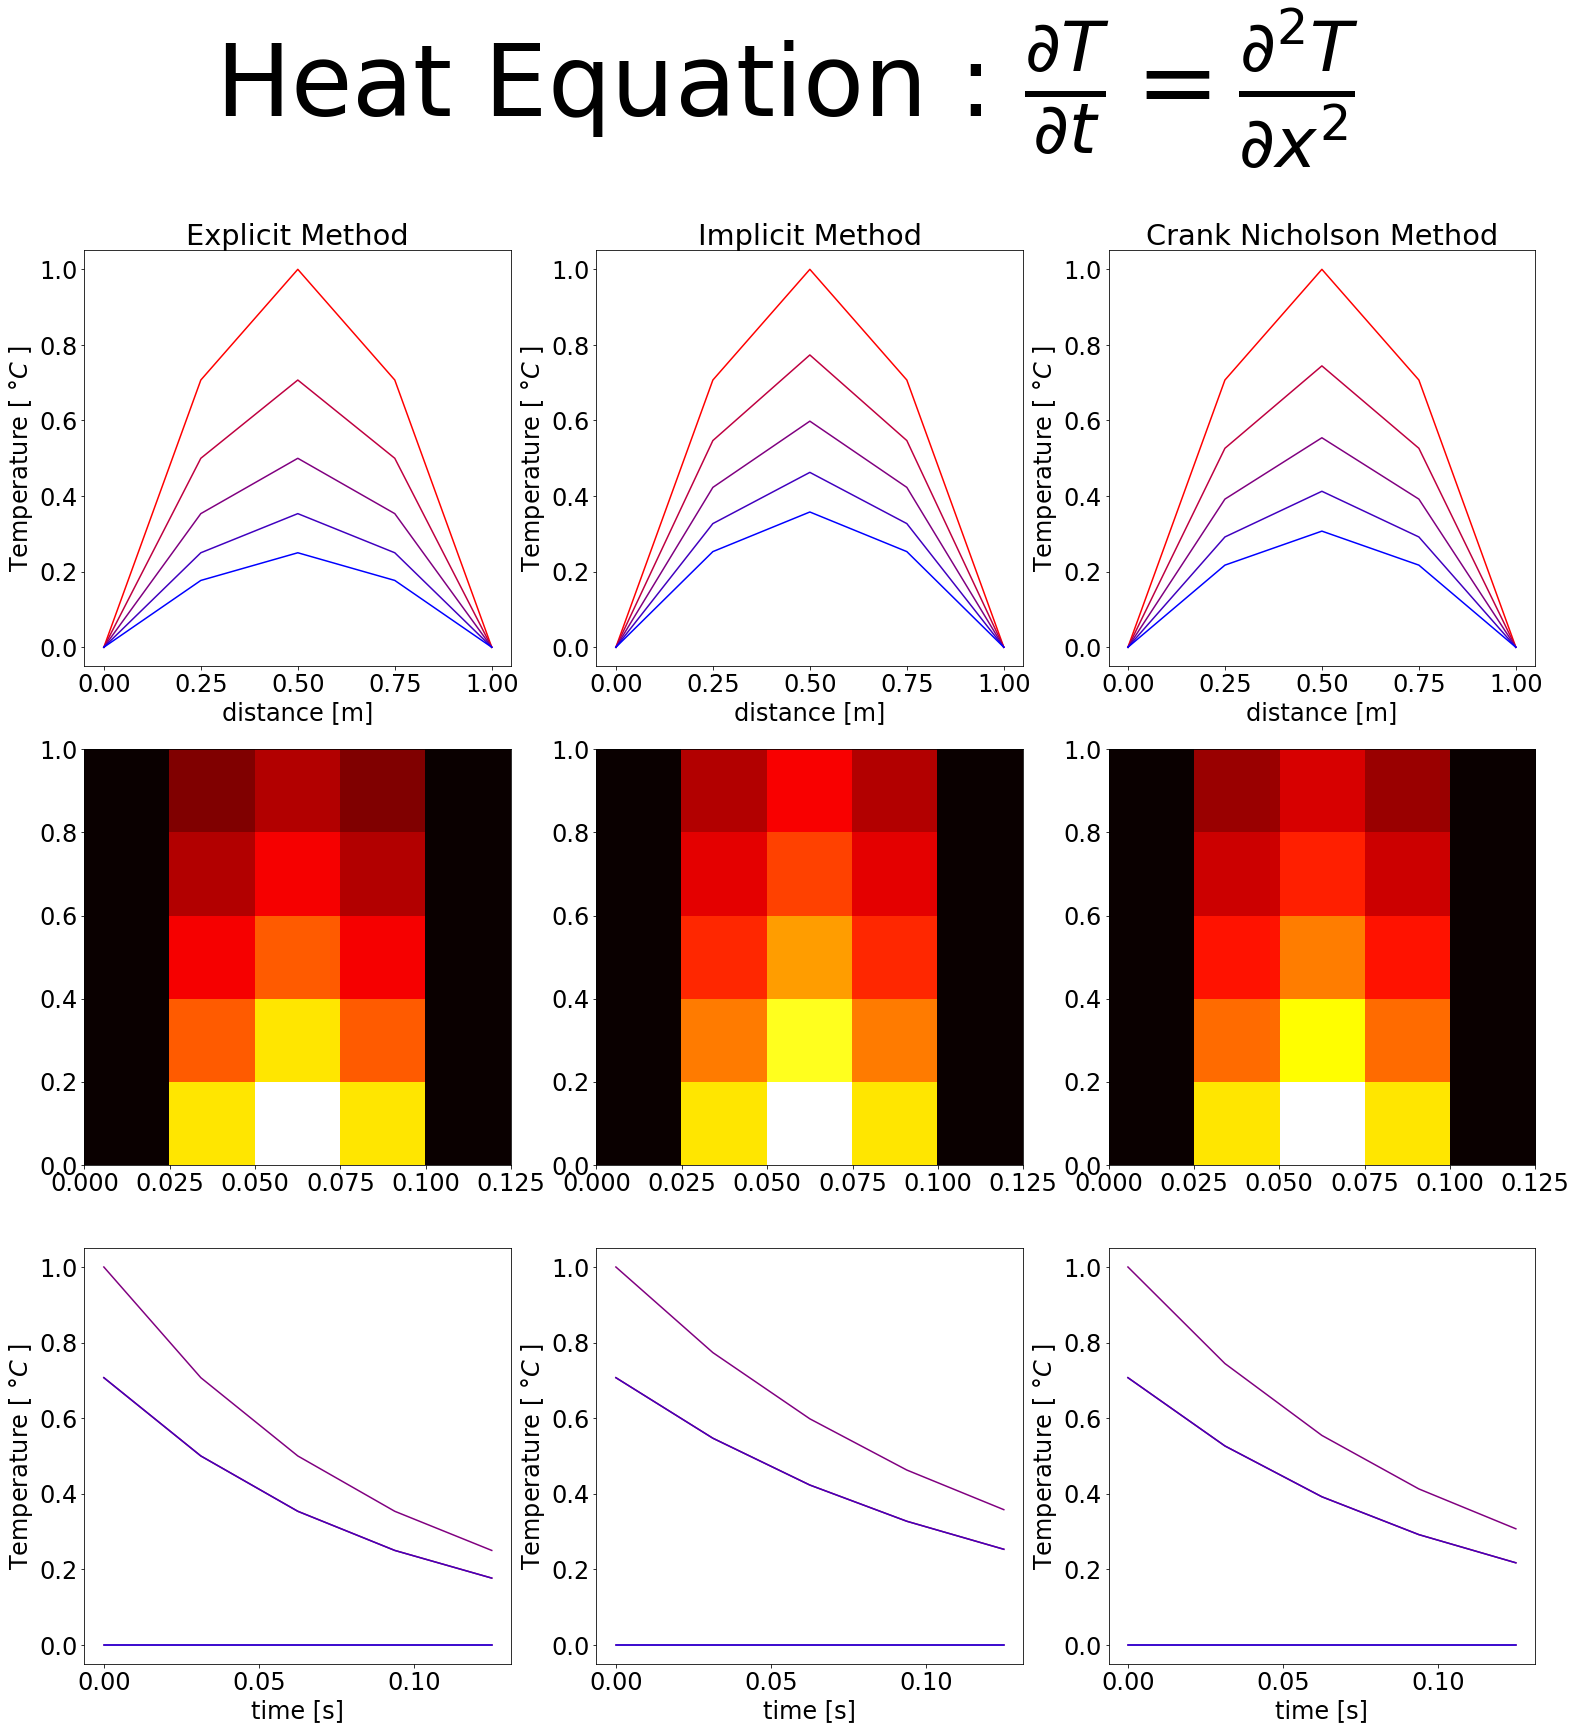

In [17]:
h=0.25
k=0.03125
a=1
b=0.1
A,B=0,0
x=np.arange(0,a+h,h)
t=np.arange(0,b+k,k)
boundaryConditions=[A,B]
initialConditions=np.sin(np.pi*x)

display(Math(r'\lambda = '+latex(k/h**2)))

EH=explicit_heat(heat_eqn,h,k,x,t,boundaryConditions,initialConditions)

IH=implicit_heat(heat_eqn,h,k,x,t,boundaryConditions,initialConditions)

CN=Crank_Nicholson_heat(heat_eqn,h,k,x,t,boundaryConditions,initialConditions)

display(Math(r'T_{explicit} = '+latex(Matrix(EH.round(3))) + \
             r'T_{implicit} = '+latex(Matrix(IH.round(3))) + \
             r'T_{Crank Nicholson} = '+latex(Matrix(CN.round(3)))))
fig=plt.figure(figsize=(26,26))
gs=fig.add_gridspec(3,3)
ax1=fig.add_subplot(gs[0,0])
ax2=fig.add_subplot(gs[0,1])
ax3=fig.add_subplot(gs[0,2])
ax4=fig.add_subplot(gs[1,0])
ax5=fig.add_subplot(gs[1,1])
ax6=fig.add_subplot(gs[1,2])
ax7=fig.add_subplot(gs[2,0])
ax8=fig.add_subplot(gs[2,1])
ax9=fig.add_subplot(gs[2,2])
fig.suptitle(r'Heat Equation : $ \frac{ \partial T}{\partial t}=\frac{\partial^2 T}{\partial x^2}$',
             fontsize=100,y=1.01)
R=np.linspace(1,0,len(t))
G=0
B=np.linspace(0,1,len(t))
for j in range(len(t)):
    ax1.plot(x,EH[:,j],color=[R[j],G,B[j]])
    ax2.plot(x,IH[:,j],color=[R[j],G,B[j]])
    ax3.plot(x,CN[:,j],color=[R[j],G,B[j]])
ax1.set_xlabel('distance [m]')
ax1.set_ylabel(r'Temperature [ $\degree C$ ]')
ax1.set_title('Explicit Method')
ax2.set_xlabel('distance [m]')
ax2.set_ylabel(r'Temperature [ $\degree C$ ]')
ax2.set_title('Implicit Method')
ax3.set_xlabel('distance [m]')
ax3.set_ylabel(r'Temperature [ $\degree C$ ]')
ax3.set_title('Crank Nicholson Method')

ax4.imshow(EH.T, cmap='hot', origin='lower',extent=[0, t[-1], 0, x[-1]], aspect='auto')
ax5.imshow(IH.T, cmap='hot', origin='lower',extent=[0, t[-1], 0, x[-1]], aspect='auto')
ax6.imshow(CN.T, cmap='hot', origin='lower',extent=[0, t[-1], 0, x[-1]], aspect='auto')

R=np.linspace(1,0,len(x))
G=0
B=np.linspace(0,1,len(x))
for i in range(len(x)):
    ax7.plot(t,EH[i,:],color=[R[i],G,B[i]])
    ax8.plot(t,IH[i,:],color=[R[i],G,B[i]])
    ax9.plot(t,CN[i,:],color=[R[i],G,B[i]])
ax7.set_xlabel('time [s]')
ax7.set_ylabel(r'Temperature [ $\degree C$ ]')
ax8.set_xlabel('time [s]')
ax8.set_ylabel(r'Temperature [ $\degree C$ ]')
ax9.set_xlabel('time [s]')
ax9.set_ylabel(r'Temperature [ $\degree C$ ]')
plt.show()

<IPython.core.display.Math object>

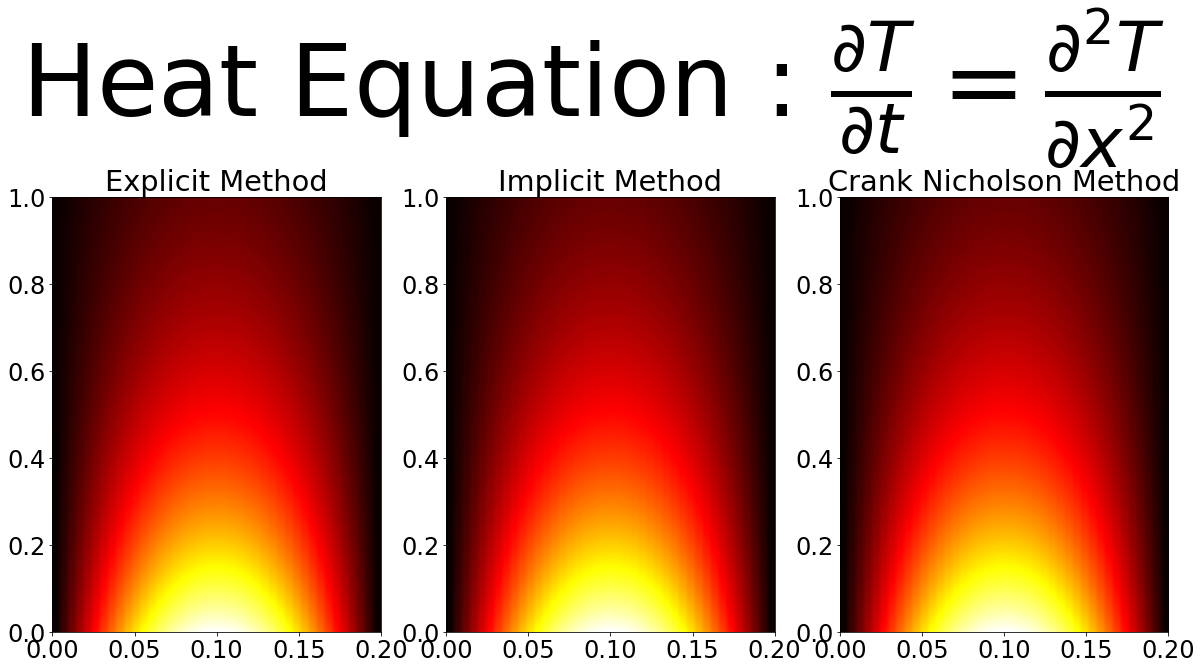

In [28]:
h=0.025
k=0.00025
a=1
b=0.2
A,B=0,0
x=np.arange(0,a+h,h)
t=np.arange(0,b+k,k)
boundaryConditions=[A,B]
initialConditions= np.sin(np.pi*x)
display(Math(r'\lambda = '+latex(k/h**2)))

EH=explicit_heat(heat_eqn,h,k,x,t,boundaryConditions,initialConditions)

IH=implicit_heat(heat_eqn,h,k,x,t,boundaryConditions,initialConditions)

CN=Crank_Nicholson_heat(heat_eqn,h,k,x,t,boundaryConditions,initialConditions)


fig=plt.figure(figsize=(20,8))
gs=fig.add_gridspec(1,3)
ax1=fig.add_subplot(gs[0,0])
ax2=fig.add_subplot(gs[0,1])
ax3=fig.add_subplot(gs[0,2])

fig.suptitle(r'Heat Equation : $\frac{ \partial T}{\partial t}=\frac{\partial^2 T}{\partial x^2}$',
             fontsize=100,y=1.21)
ax1.set_title('Explicit Method')
ax2.set_title('Implicit Method')
ax3.set_title('Crank Nicholson Method')
ax1.imshow(EH.T, cmap='hot', origin='lower',extent=[0, t[-1], 0, x[-1]], aspect='auto')
ax2.imshow(IH.T, cmap='hot', origin='lower',extent=[0, t[-1], 0, x[-1]], aspect='auto')
ax3.imshow(CN.T, cmap='hot', origin='lower',extent=[0, t[-1], 0, x[-1]], aspect='auto')
plt.show()

<IPython.core.display.Math object>

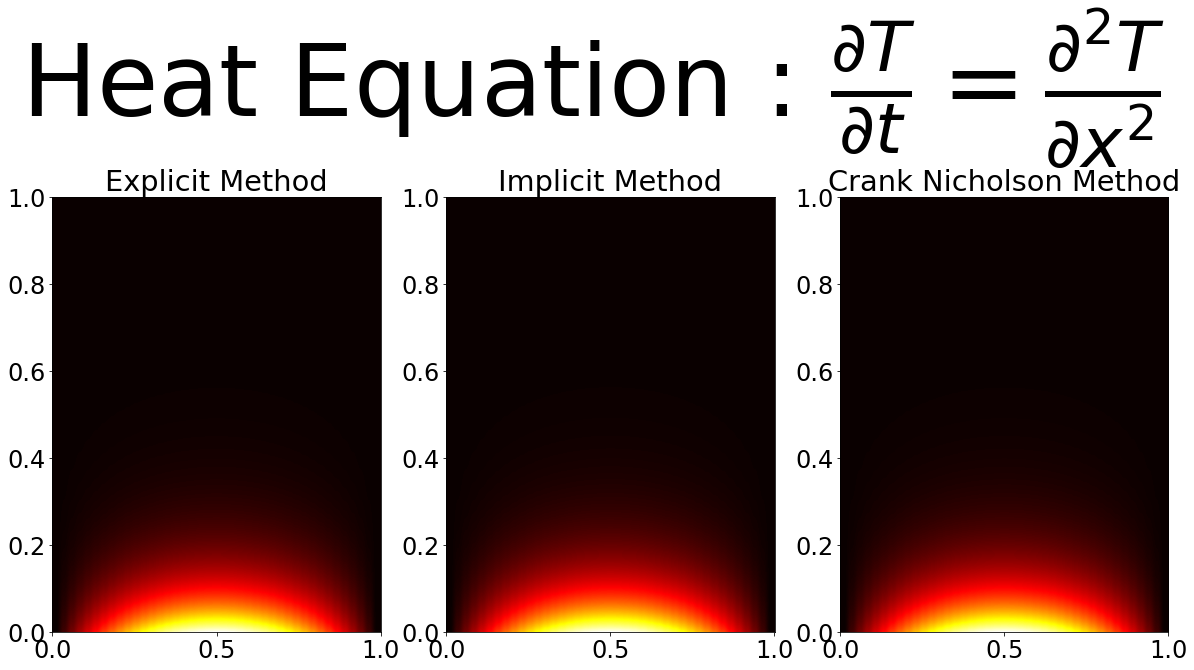

In [29]:
h=0.025
k=0.00025
a=1
b=1
A,B=0,0
x=np.arange(0,a+h,h)
t=np.arange(0,b+k,k)
boundaryConditions=[A,B]
initialConditions= np.sin(np.pi*x)
display(Math(r'\lambda = '+latex(k/h**2)))

EH=explicit_heat(heat_eqn,h,k,x,t,boundaryConditions,initialConditions)

IH=implicit_heat(heat_eqn,h,k,x,t,boundaryConditions,initialConditions)

CN=Crank_Nicholson_heat(heat_eqn,h,k,x,t,boundaryConditions,initialConditions)


fig=plt.figure(figsize=(20,8))
gs=fig.add_gridspec(1,3)
ax1=fig.add_subplot(gs[0,0])
ax2=fig.add_subplot(gs[0,1])
ax3=fig.add_subplot(gs[0,2])

fig.suptitle(r'Heat Equation : $\frac{ \partial T}{\partial t}=\frac{\partial^2 T}{\partial x^2}$',
             fontsize=100,y=1.21)
ax1.set_title('Explicit Method')
ax2.set_title('Implicit Method')
ax3.set_title('Crank Nicholson Method')
ax1.imshow(EH.T, cmap='hot', origin='lower',extent=[0, t[-1], 0, x[-1]], aspect='auto')
ax2.imshow(IH.T, cmap='hot', origin='lower',extent=[0, t[-1], 0, x[-1]], aspect='auto')
ax3.imshow(CN.T, cmap='hot', origin='lower',extent=[0, t[-1], 0, x[-1]], aspect='auto')
plt.show()

<IPython.core.display.Math object>

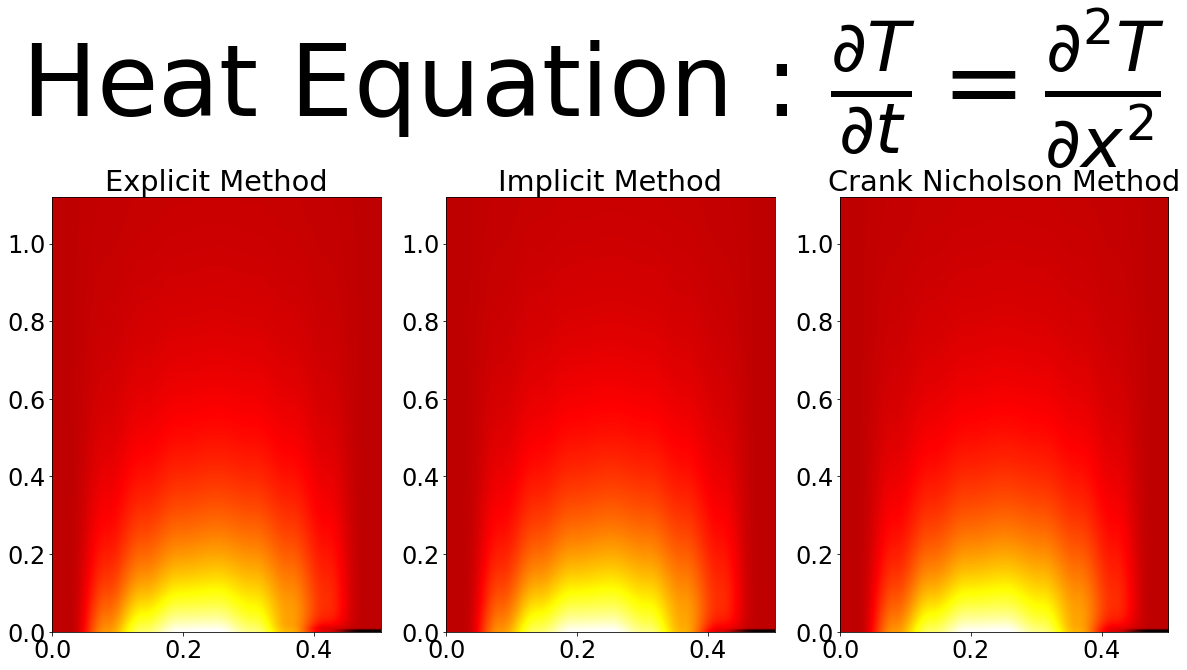

In [30]:
h=0.14
k=0.003138
a=1
b=0.5
A,B=0,0
x=np.arange(0,a+h,h)
t=np.arange(0,b+k,k)
boundaryConditions=[A,B]
initialConditions= np.sin(np.pi*x)
display(Math(r'\lambda = '+latex(k/h**2)))

EH=explicit_heat(heat_eqn,h,k,x,t,boundaryConditions,initialConditions)

IH=implicit_heat(heat_eqn,h,k,x,t,boundaryConditions,initialConditions)

CN=Crank_Nicholson_heat(heat_eqn,h,k,x,t,boundaryConditions,initialConditions)


fig=plt.figure(figsize=(20,8))
gs=fig.add_gridspec(1,3)
ax1=fig.add_subplot(gs[0,0])
ax2=fig.add_subplot(gs[0,1])
ax3=fig.add_subplot(gs[0,2])

fig.suptitle(r'Heat Equation : $ \frac{ \partial T}{\partial t}=\frac{\partial^2 T}{\partial x^2}$',
             fontsize=100,y=1.21)
ax1.set_title('Explicit Method')
ax2.set_title('Implicit Method')
ax3.set_title('Crank Nicholson Method')
ax1.imshow(EH.T, cmap='hot', origin='lower',extent=[0, t[-1], 0, x[-1]], aspect='auto')
ax2.imshow(IH.T, cmap='hot', origin='lower',extent=[0, t[-1], 0, x[-1]], aspect='auto')
ax3.imshow(CN.T, cmap='hot', origin='lower',extent=[0, t[-1], 0, x[-1]], aspect='auto')
plt.show()

For $\theta = 0$ the scheme is clearly explicit.                                                                          
For $\theta > 0$ the scheme is implicit, but care has to be taken about the meaning.                                     
Indeed for $0 ≤ θ ≤ 0.5,$ it can be shown that the scheme has problems in robustness.                                        
For $\theta ≥ 0.5,$ we have a better properties. Indeed, for θ = 1, we obtain the very stable (implicit) backward Euler scheme.                                                                                                                      
Finally for $\theta = 0.5,$ the resulting scheme has similarities with the trapezoidal rule in numerical
quadrature,                                                                                                               
can specifically in application of the heat equation it is known as $\textbf{Crank-Nicolson scheme}$.